# ***End-to-End ML Pipeline with Scikit-learn Pipeline API***

In [2]:
!pip install kaggle -q

In [3]:
from google.colab import files

# 1. Upload the file
print("Please select the 'kaggle.json' file to upload:")
files.upload()

# 2. Move the file and set permissions
# This creates the .kaggle folder and moves the file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# This command changes the file permissions to be read/write only by the user
! chmod 600 ~/.kaggle/kaggle.json

print("\nAuthentication successful!")

Please select the 'kaggle.json' file to upload:


Saving kaggle.json to kaggle.json

Authentication successful!


In [4]:
#!/bin/bash
!kaggle datasets download yeanzc/telco-customer-churn-ibm-dataset

Dataset URL: https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
License(s): other
  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 832MB/s]


In [5]:
import zipfile
import os

# 1. Define the name of the zip file (adjust this to your dataset name)
# The ZIP file name is usually the dataset_name part of the command.
zip_file_name = 'telco-customer-churn-ibm-dataset.zip'

# 2. Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('.') # Extracts all files to the current directory

# 3. Clean up the zip file (optional)
os.remove(zip_file_name)

print(f"\nFiles extracted. Check the file browser on the left for your data!")


Files extracted. Check the file browser on the left for your data!


## ***Import Libraries***

In [41]:
# to handle data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to preprocess data

from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# machine learning tasks
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# ignore warnings

import warnings
warnings.filterwarnings('ignore')

# Save the model
import joblib



## ***Load the Dataset***

In [7]:
# Load dataset

df = pd.read_excel('/content/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [8]:
# Shape of data

df.shape

(7043, 33)

- ***So, we have `7043` rows and `33` columns***

In [9]:
# Information about data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

- ***So, it contains both `numerical` and `categorical` datatypes***

In [10]:
# Columns in the dataset

df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [11]:
# check null values in percentage

print(df.isnull().sum().sort_values(ascending=False))

Churn Reason         5174
CustomerID              0
Count                   0
State                   0
Country                 0
Zip Code                0
Lat Long                0
Latitude                0
City                    0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Longitude               0
Internet Service        0
Online Security         0
Device Protection       0
Online Backup           0
Streaming TV            0
Streaming Movies        0
Contract                0
Tech Support            0
Paperless Billing       0
Payment Method          0
Total Charges           0
Monthly Charges         0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
dtype: int64


- ***So, we have `null values` in `Churn Reason` column***

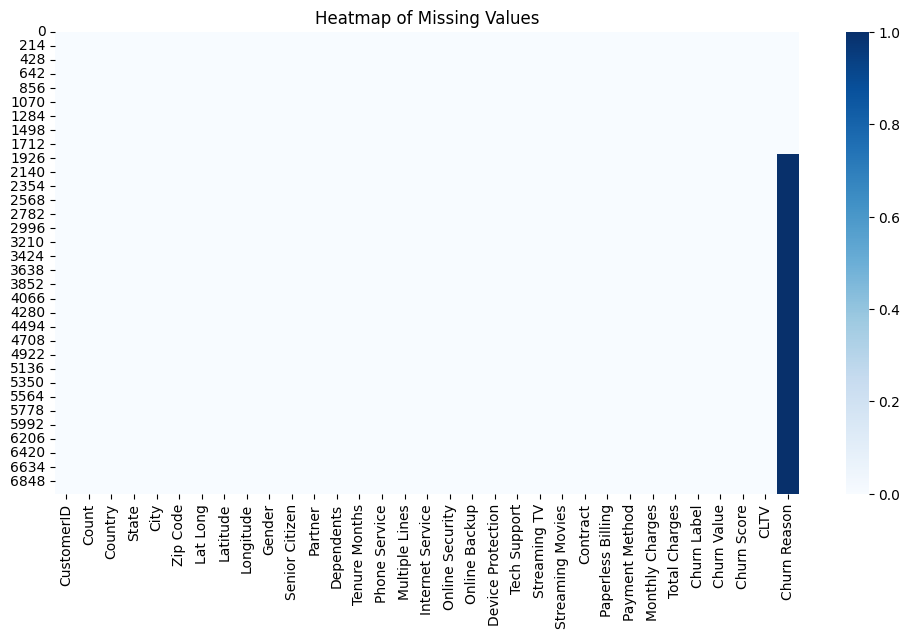

In [12]:
# Heatmap of missing values

fig = plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=True,cmap='Blues')
plt.title('Heatmap of Missing Values')
plt.show()

In [13]:
# Check Dupliate Values

print(f'So we have duplicate values in dataset \n{df.duplicated().sum()}')

So we have duplicate values in dataset 
0


- ***We remove customerID because it does not help in prediction***

In [14]:
df = df.drop('CustomerID',axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

- ***Spilit into X and Y features***

In [16]:
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV,Churn Reason
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,86,3239,Competitor made better offer
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,67,2701,Moved
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,86,5372,Moved
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,84,5003,Moved
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,89,5340,Competitor had better devices


## ***Pipeline***

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

In [20]:
class TelcoDataCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create a copy to avoid SettingWithCopyWarning
        X = X.copy()

        if 'Total Charges' in X.columns:
            # 1. Replace empty strings/spaces with NaN
            # 2. Force conversion to float64
            X['Total Charges'] = pd.to_numeric(X['Total Charges'], errors='coerce')

            # 3. Explicitly cast to float to ensure the dtype is not 'object'
            X['Total Charges'] = X['Total Charges'].astype(float)

        return X

- ***Separate the features based on the data type***

In [21]:
X_train.select_dtypes(include=np.number).columns

Index(['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
       'Monthly Charges', 'Churn Score', 'CLTV'],
      dtype='object')

In [22]:
# Define columns
num_cols = ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
            'Monthly Charges', 'Churn Score', 'CLTV']
cat_cols = ['Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen',
            'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
            'Internet Service', 'Online Security', 'Online Backup',
            'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
            'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label','Churn Reason','Total Charges']



- ***Numerical Pipeline***

In [23]:
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Handles the NaNs from TotalCharges
    ('scaler', StandardScaler())
])



- ***Categorical Pipeline***

In [24]:
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

- ***Column Transformer***

In [25]:
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])


- ***Complete Pipeline***

In [26]:
full_pipeline = Pipeline([
    ('cleaner', TelcoDataCleaner()),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])


- ***Tain the Pipeline***

In [27]:
# Fit the entire pipeline
full_pipeline.fit(X_train, y_train,)



Pipeline(steps=[('cleaner', TelcoDataCleaner()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Count', 'Zip Code',
                                                   'Latitude', 'Longitude',
                                                   'Tenure Months',
                                                   'Monthly Charges',
                                                   'Churn Score', 'CLTV']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='mos...
                                                   'Senior Citizen', 'Partner',
                                                   'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method',
                                                   'Churn Label',
                                                   'Churn Reason',
                                                   'Total Charges'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

- ***Prediction***

In [28]:
# Predict
y_pred = full_pipeline.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



## ***Prediction On New Data***

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              5634 non-null   int64  
 1   Country            5634 non-null   object 
 2   State              5634 non-null   object 
 3   City               5634 non-null   object 
 4   Zip Code           5634 non-null   int64  
 5   Lat Long           5634 non-null   object 
 6   Latitude           5634 non-null   float64
 7   Longitude          5634 non-null   float64
 8   Gender             5634 non-null   object 
 9   Senior Citizen     5634 non-null   object 
 10  Partner            5634 non-null   object 
 11  Dependents         5634 non-null   object 
 12  Tenure Months      5634 non-null   int64  
 13  Phone Service      5634 non-null   object 
 14  Multiple Lines     5634 non-null   object 
 15  Internet Service   5634 non-null   object 
 16  Online Security    5634 non

In [30]:
# Create a dummy "new" customer
new_customer = pd.DataFrame({
    'Count': [1], 'Country': ['United States'], 'State': ['California'], 'City': ['Los Angeles'],'Zip Code': [90001],
    'Lat Long': ['34.0536909,-118.242766'], 'Latitude': [34.0536909], 'Longitude': [-118.242766],
    'Gender': ['Female'], 'Senior Citizen': [0], 'Partner': ['Yes'], 'Dependents': ['No'],
    'Tenure Months': [1], 'Phone Service': ['No'], 'Multiple Lines': ['No phone service'],
    'Internet Service': ['DSL'], 'Online Security': ['No'], 'Online Backup': ['Yes'],
    'Device Protection': ['No'], 'Tech Support': ['No'], 'Streaming TV': ['No'],
    'Streaming Movies': ['No'], 'Contract': ['Month-to-month'], 'Paperless Billing': ['Yes'],
    'Payment Method': ['Electronic check'], 'Monthly Charges': [29.85], 'Total Charges': [' '],
    'Churn Label': ['No'], 'Churn Score': [88], 'CLTV': [1500], 'Churn Reason': ['']
})

In [31]:
# The pipeline handles the space, scaling, and encoding automatically
prediction = full_pipeline.predict(new_customer)
probability = full_pipeline.predict_proba(new_customer)[:, 1]

print(f"Churn Prediction: {'Yes' if prediction[0] == 1 else 'No'}")
print(f"Churn Probability: {probability[0]:.2%}")

Churn Prediction: No
Churn Probability: 44.00%


## ***Hyperparameter tuning***

In [38]:
param_grid = {
    # 1. Tuning the Preprocessing (Numerical Imputer)
    'preprocessor__num__imputer__strategy': ['mean', 'median'],

    # 2. Tuning the Model (Random Forest)
    'classifier__max_depth': [None, 10],
    'classifier__criterion': ['gini', 'entropy']
}

In [39]:
grid_search = GridSearchCV(
    estimator=full_pipeline,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='f1',        # Focus on a balance of Precision and Recall
    n_jobs=-1,           # Use all available CPU cores
    verbose=1            # Show progress
)

# Fit the grid search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cleaner', TelcoDataCleaner()),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Count',
                                                                          'Zip '
                                                                          'Code',
                                                                          'Latitude',
                                                                          'Longitude',
                                                                          'Tenure '
                                                                          'Months',
                                                                          'Monthly '
                                                                          'Charges',
                                                                          'Churn '
                                                                          'Score',
                                                                          'CLTV']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('...
                                                                          'Paperless '
                                                                          'Billing',
                                                                          'Payment '
                                                                          'Method',
                                                                          'Churn '
                                                                          'Label',
                                                                          'Churn '
                                                                          'Reason',
                                                                          'Total '
                                                                          'Charges'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             scoring='f1', verbose=1)

## ***Best Hyperparameter Tune Model***

In [40]:
print(f"Best F1 Score: {grid_search.best_score_:.4f}")
print("Best Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

# The best_estimator_ is the FULL pipeline with the best settings already loaded
best_model = grid_search.best_estimator_

# Final evaluation on the test set
final_preds = best_model.predict(X_test)
print("\nFinal Test Set Performance:")
print(classification_report(y_test, final_preds))


Best F1 Score: 1.0000
Best Parameters:
  classifier__criterion: entropy
  classifier__max_depth: None
  preprocessor__num__imputer__strategy: mean

Final Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



## ***Save The Model***

In [42]:
# We save the 'best_estimator_' which is the optimized full pipeline
model_filename = 'telco_churn_pipeline.pkl'

# Exporting
joblib.dump(grid_search.best_estimator_, model_filename)

print(f"✅ Pipeline exported successfully to {model_filename}")

✅ Pipeline exported successfully to telco_churn_pipeline.pkl
